In [1]:
from time import strptime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# Supplementary functions for data parsing and tidying

# Month to int function

def month_str_to_int(month): # convert a month's name to a float number
    try:
        month_num = strptime(month, '%B').tm_mon
    except:
        return None
    return month_num


def convert_column_to_num_month(df, column_name): #apply month_str_to_int to a whole column
    df = df[column_name]
    df = df.apply(month_str_to_int)
    df = df.apply(lambda x: "{:.0f}".
                  format(x) if not pd.isnull(x) else x) # format as int
    df = df.apply(lambda x: int(x) if not pd.isnull(x) else x)
    return df

# def strip_week_column():# Guy


def csv_load(file): # suuplementry to load a CSV file and return as df, in the future to be extended
    df = pd.read_csv(file)
    return df

#Correlation creator
## This function shall be used for numeric features only

def plot_correlations(feature1, feature2):
    plt.plot(df[feature1], df[feature2])
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(("The correlation between {} and {}".format(feature1, feature2)))
    plt.show()
    return


def plot_scatter(feature1, feature2):
    plt.scatter(df[feature1], df[feature2])
    plt.grid()
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.title(("The correlation between {} and {}".format(feature1, feature2)))
    plt.show()
    return


In [3]:
# Main build

df = csv_load("Data/feature_data.csv") #Reading the CSV data file
features = df.columns

# Data manipulations

df["order_month"] = convert_column_to_num_month(df, "order_month")

In [4]:
# Part 1: Exploration, Basic Hypothesis

# plot_correlations("changes", "prev_canceled")

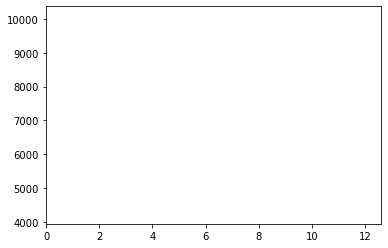

In [7]:
#1 number of orders per month. Conclusion: August is the most...

# plot_scatter("order_year", "time_until_order")
orders_per_month = dict(Counter(df['order_month']))
months = sorted(list(orders_per_month.keys()))
orders_num = [orders_per_month[val] for val in months]
plt.barh(orders_num, months)
plt.show()

In [ ]:
#2 number of children affecting month of order
orders_per_month = dict(Counter(df['order_month']))
months = sorted(list(orders_per_month.keys()))
orders_num = [orders_per_month[val] for val in months]
plt.scatter(months, orders_num)
plt.show()